In [39]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString

In [48]:
df = pd.read_excel("../data/links_de_power_151109.xlsx")
df = df.astype(
    {"operator": str,}
)[["voltage", "name", "operator", "wkt_srid_4326"]]

In [49]:
df.head()

,voltage,name,operator,wkt_srid_4326
0,220000,Leitung 2016,TenneT,SRID=4326;LINESTRING(9.52257596986262 52.36040...
1,380000,Leitung 3011,TenneT,SRID=4326;LINESTRING(9.38974509624863 52.02631...
2,220000,Leitung 2024,TenneT,SRID=4326;LINESTRING(10.3662749375017 52.28464...
3,380000,Leitung 3026,TenneT,SRID=4326;LINESTRING(9.91717971972185 52.27816...
4,380000,KKW Krümmel - UW Lüneburg,transpower,SRID=4326;LINESTRING(10.4149923381504 53.41260...


In [50]:
df = df[df["operator"].str.contains("TenneT")]
df["wkt_srid_4326"] = df["wkt_srid_4326"] .str.replace("SRID=4326;", "", regex=True)
df = df.rename(columns={"wkt_srid_4326": "geometry"})
df

,voltage,name,operator,geometry
0,220000,Leitung 2016,TenneT,"LINESTRING(9.52257596986262 52.3604090557601,9..."
1,380000,Leitung 3011,TenneT,"LINESTRING(9.38974509624863 52.0263130660355,9..."
2,220000,Leitung 2024,TenneT,"LINESTRING(10.3662749375017 52.2846467462009,9..."
3,380000,Leitung 3026,TenneT,"LINESTRING(9.91717971972185 52.2781686139394,1..."
8,220000,Oba-Nfi I,TenneT TSO GmbH,"LINESTRING(11.3704262486892 48.2914922329548,1..."
...,...,...,...,...
817,220000,202 II,TenneT,"LINESTRING(9.44963652666114 53.967286497351,9...."
818,220000,202 II,TenneT,"LINESTRING(9.34400177215961 53.8517774635399,9..."
822,380000,Audorf - Jardelund,TenneT TSO GmbH,"LINESTRING(9.31819523638713 54.7160494089748,9..."
823,380000,Audorf - Jardelund,TenneT TSO GmbH,"LINESTRING(9.19698235871826 54.8510986052119,9..."


In [51]:
df["geometry"] = gpd.GeoSeries.from_wkt(df['geometry'])
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry="geometry")
gdf

,voltage,name,operator,geometry
0,220000,Leitung 2016,TenneT,"LINESTRING (9.52258 52.36041, 9.11321 52.54385)"
1,380000,Leitung 3011,TenneT,"LINESTRING (9.38975 52.02631, 9.12527 52.53826)"
2,220000,Leitung 2024,TenneT,"LINESTRING (10.36627 52.28465, 9.91815 52.38000)"
3,380000,Leitung 3026,TenneT,"LINESTRING (9.91718 52.27817, 10.36627 52.28465)"
8,220000,Oba-Nfi I,TenneT TSO GmbH,"LINESTRING (11.37043 48.29149, 11.81323 48.22127)"
...,...,...,...,...
817,220000,202 II,TenneT,"LINESTRING (9.44964 53.96729, 9.45968 53.86466)"
818,220000,202 II,TenneT,"LINESTRING (9.34400 53.85178, 9.45968 53.86466)"
822,380000,Audorf - Jardelund,TenneT TSO GmbH,"LINESTRING (9.31820 54.71605, 9.33223 54.72102)"
823,380000,Audorf - Jardelund,TenneT TSO GmbH,"LINESTRING (9.19698 54.85110, 9.33223 54.72102)"


In [53]:
df.operator.unique()

array(['TenneT', 'TenneT TSO GmbH', 'CEPS;TenneT TSO GmbH',
       'Amprion;TenneT', 'Energinet.dk;TenneT'], dtype=object)

<Axes: >

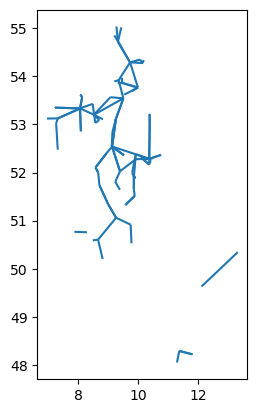

In [52]:
gdf.plot()